In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Постановка задачи: определить по каким характеристикам клиенты покидают компанию.

Целевой признак (target) - churn (отток), имеет тип bool. Принимает два значения: "False" - является клиентом компании; "True" - клиент покинул компанию. Рассматривается задача обучения с учителем - классификация.

In [6]:
df['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Имеет примерно 85.5% лояльных клиентов и примерно 14.5% нелояльных клиентов.

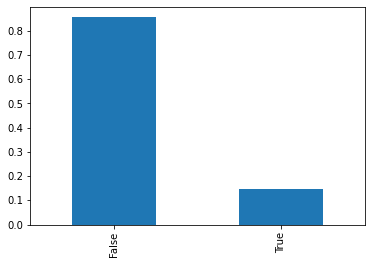

In [7]:
df['churn'].value_counts(normalize = True).plot(kind = 'bar')

Так как есть существенная разница между лояльными и нелояльными клиентами, то классы "False" и "True" - несбалансированы.

In [8]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
NV     66
WA     66
CO     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Исходя из полученных данных получается, что информация по штатам особо не влияет на отток клиентов. Поэтому уберём её из таблицы.

In [9]:
df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Номер телефона у всех уникальный, поэтому эта характеристика никак не влияет на отток клиентов. Тоже уберём это из таблицы.

In [10]:
df_1 = df.drop(["state","phone number"], axis = 1)

In [11]:
df_2 = df_1.copy()

df_2["area code"] = df['area code'].map({415:0,510:1,408:2})
df_2["international plan"] = df['international plan'].map({"yes":1,"no":0})
df_2["voice mail plan"] = df['voice mail plan'].map({"yes":1,"no":0})
df_2["churn"] = df['churn'].map({False:0,True:1})

In [12]:
df_2

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,1,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [13]:
df_3 = df_2.drop(["churn"], axis = 1)

df_3

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,1,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform(df_3)

X

array([[ 0.67648946, -0.91015679, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.91015679, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.91015679, -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538,  0.29554773, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  0.29554773,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.91015679, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [16]:
from sklearn.model_selection import train_test_split

#X найден ранее
y = df_2['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_valid)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)

0.8920863309352518

Модель на валидационной выборке с достаточно большой точностью угадывает значение churn.

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(cross_val_score(knn, X, y, cv = kf, scoring = 'accuracy'))

[0.88905547 0.87706147 0.88455772 0.89339339 0.87387387]


Использование нашей метрики приемлемо, так как качество модели очень приближенная от вычисленной ранее.

In [22]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': np.arange(1, 21)}
knn_grid = GridSearchCV(knn, knn_params, scoring = 'accuracy', cv = kf)
knn_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [23]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [24]:
knn_grid.best_score_

0.8877907892900396

In [25]:
knn_grid.best_params_

{'n_neighbors': 7}

В этом случае качество получилось наилучшим при k = 7, её оценка качества равна 0.8877907892900396.

In [26]:
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005812,0.000071,0.075264,0.000588,1,{'n_neighbors': 1},0.865067,0.856072,0.848576,0.873874,0.839339,0.856586,0.012105,20
1,0.005754,0.000054,0.082035,0.001496,2,{'n_neighbors': 2},0.874063,0.868066,0.874063,0.893393,0.858859,0.873689,0.011315,19
2,0.005787,0.000100,0.082703,0.000500,3,{'n_neighbors': 3},0.889055,0.877061,0.884558,0.893393,0.873874,0.883588,0.007266,5
3,0.005685,0.000053,0.083970,0.000583,4,{'n_neighbors': 4},0.880060,0.880060,0.881559,0.900901,0.870871,0.882690,0.009863,6
4,0.005777,0.000059,0.086139,0.000450,5,{'n_neighbors': 5},0.875562,0.884558,0.887556,0.900901,0.887387,0.887193,0.008128,2
5,0.005768,0.000020,0.086960,0.000540,6,{'n_neighbors': 6},0.875562,0.868066,0.883058,0.896396,0.876877,0.879992,0.009488,8
6,0.005826,0.000094,0.087818,0.000769,7,{'n_neighbors': 7},0.886057,0.883058,0.887556,0.902402,0.879880,0.887791,0.007766,1
7,0.005744,0.000053,0.088210,0.000497,8,{'n_neighbors': 8},0.878561,0.868066,0.883058,0.899399,0.870871,0.879991,0.011077,9
8,0.005741,0.000059,0.089008,0.000315,9,{'n_neighbors': 9},0.889055,0.874063,0.886057,0.902402,0.878378,0.885991,0.009787,3
9,0.005761,0.000064,0.089075,0.000509,10,{'n_neighbors': 10},0.877061,0.868066,0.883058,0.897898,0.864865,0.878190,0.011777,12


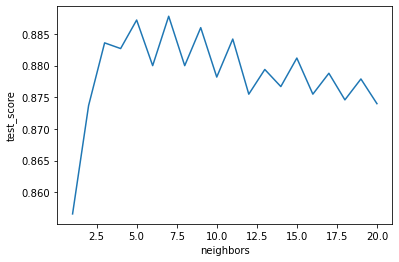

In [27]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('neighbors')
plt.ylabel('test_score')
plt.show()

In [28]:
p_params = {'p': np.linspace(1,10,200)}
knn_1 = KNeighborsClassifier(n_neighbors=7, weights = 'distance', n_jobs = -1)
knn_cv = GridSearchCV(knn_1, p_params, cv = kf, scoring='accuracy', verbose = 100)
knn_cv.fit(X,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.889, total=   1.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.885, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.888, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.898, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | ela

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=7,
                                            weights='distance'),
             param_grid={'p': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422,...
        8.68844221,  8.73366834,  8.77889447,  8.8241206 ,  8.86934673,
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])},
             scoring='accuracy', verbose=100)

In [29]:
pd.DataFrame(knn_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006593,0.000583,0.412577,0.737312,1,{'p': 1.0},0.889055,0.884558,0.887556,0.897898,0.873874,0.886588,0.007755,23
1,0.006893,0.000116,0.783084,0.004518,1.04523,{'p': 1.0452261306532664},0.889055,0.886057,0.887556,0.899399,0.875375,0.887489,0.007656,20
2,0.007093,0.000097,0.786136,0.004396,1.09045,{'p': 1.0904522613065326},0.892054,0.886057,0.887556,0.897898,0.878378,0.888389,0.006484,13
3,0.006862,0.000132,0.805994,0.039461,1.13568,{'p': 1.135678391959799},0.893553,0.886057,0.889055,0.903904,0.879880,0.890490,0.008045,1
4,0.006883,0.000198,0.780297,0.004556,1.1809,{'p': 1.1809045226130652},0.890555,0.886057,0.889055,0.902402,0.879880,0.889590,0.007378,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.006850,0.000208,0.524374,0.008591,9.8191,{'p': 9.819095477386934},0.878561,0.869565,0.869565,0.894895,0.870871,0.876691,0.009699,194
196,0.006940,0.000074,0.544669,0.050042,9.86432,{'p': 9.864321608040202},0.878561,0.869565,0.869565,0.894895,0.870871,0.876691,0.009699,194
197,0.007777,0.001222,0.551469,0.034270,9.90955,{'p': 9.909547738693467},0.878561,0.869565,0.869565,0.894895,0.872372,0.876992,0.009536,181
198,0.006767,0.000184,0.563754,0.086100,9.95477,{'p': 9.954773869346734},0.878561,0.869565,0.869565,0.894895,0.872372,0.876992,0.009536,181


In [30]:
knn_cv.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=7, p=1.135678391959799,
                     weights='distance')

In [31]:
knn_cv.best_score_

0.8904898901900401

In [32]:
knn_cv.best_params_

{'p': 1.135678391959799}

При p = 1.135678391959799, качество на кросс-валидации оказалось оптимальным.

Поэкспериментируем с другими метрическими методами.

In [33]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnclassifier = RadiusNeighborsClassifier(radius=5)
rnclassifier.fit(X_train, y_train)

rnclassifier.score(X_valid, y_valid)

0.8573141486810552

Этот классификатор довольно хорошо сработал, так как у нас задача классификации.

In [34]:
from sklearn.neighbors import RadiusNeighborsRegressor

rnregressor = RadiusNeighborsRegressor(radius=5)
rnregressor.fit(X_train, y_train)

rnregressor.score(X_valid, y_valid)

0.16638853789942465

Ради интереса, попробуем метод для регрессии. Как видим он показал плохие результаты, как и ожидалось.

In [35]:
from sklearn.neighbors import NearestCentroid

ncentroid = NearestCentroid()
ncentroid.fit(X_train, y_train)

ncentroid.score(X_valid, y_valid)

0.7230215827338129

Классификатор ближайшего центроида сработал более менее, но лучшие результаты всё же показал классификатор соседей в заданном радиусе.